<a href="https://colab.research.google.com/github/bits-aci/bits-ml-assignment1/blob/dev/Group238_Heartattack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Group No:</b> 238 <br>
<b>Assignment 1 - PS-6</b><br>
<b>Assignment dataset:</b> https://www.kaggle.com/datasets/nareshbhat/health-care-data-set-on-heart-attack-possibility

<b>Group members list:</b><br>

*   Sivabalan S (2022AC05637)
*   Rupp Santos (2022ac05570)
*   Srivatsan (2022AC05629)








**Section-1 :
Import of libraries and download of data set.**


In [647]:
# Importing all necessary libraries
import numpy as nm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing sklearn library to prepare training, test data sets and display confusion matrix
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [648]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart (12).csv


**Section-2 : Data Visualization**

**Reading the data from CSV file**

In [670]:
#data_set = pd.read_csv("heart[1].csv")
data_set = pd.read_csv("heart.csv")


**DATA CLEANING AND PRE-PROCESSING**


**Sanity Check**

Visualizing the first 5 rows to check the columns


In [671]:
data_set.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The below code is for checking whether the data is complete or any NULL values are there in the data set.

In [672]:
# Command for checking if there is any NULL values in the data set
print(data_set.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


**The data set is complete and it doesnt have any NULL values**

Finding duplicates in the Data

In [673]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = data_set[data_set.duplicated()]
duplicate

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


Removing duplicates in the Data

In [674]:
data_set=data_set.drop_duplicates()
data_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [675]:
data_set.dtypes


age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [676]:
# This command for displaying all the statistical data
data_set.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Description and Correctness of data in each column:
1) age: Range is between 29 and 77.
<br>2) sex : data is binary 1- male and 0 - female
<br>3) cp (Chest Pain): Range is 0 to 3
<br>4) trestbps(rest Blood pressure) : Range is 94 to 200. 75% of the data is below 140 so there are some outliers.
<br>5) chol (Cholestrol level) : range is 126 to 564. Some people are having very high cholestrol level but 75% of the people are below 280.
<br>6) fbs (Fasting Blood sugar) : Data is coded to 1 if the fbs > 120 mg/dl and 0 if fbs < 120mg/dl.
<br>7) restecg (rest electro cardigraph results) : 0,1,2 are data updated based on the severity . People with 2 in restecg are very minimal.
<br>8) thalach (maximum heart rate acheived) : range is 71 to 202 . 50% of the people have recored above 153.
<br>9) exang (exercise induced angina) : 1 - caused by exercise 0 -Not caused by exercise
<br>10) oldpeak (ST depression induced by exercise relative to rest) : Range 0 to 6.2
<br>11) slope (the peak exercise ST segment): Range is 0 to 2
<br>12) ca (number of major vessels (0-4) colored by flourosopy) : 75% data is below 1.
<br>13) thal (0 = normal; 1 = fixed defect; 2 = reversable defect) : Most of the data is 2 - reversable defect. 3 is not defined but present in data set.
<br>14) target ( 0= less chance of heart attack 1= more chance of heart attack) : Range 0 to 1. All datas are within the range.







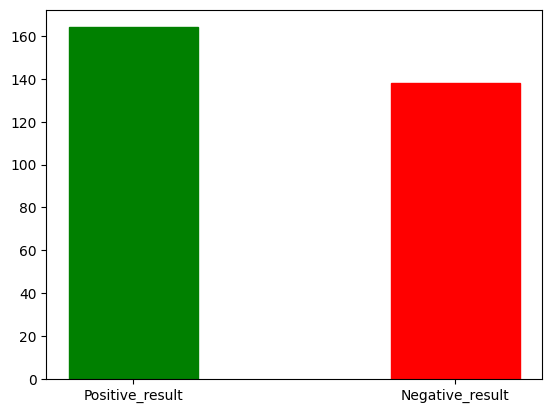

In [677]:
# Code for plotting the positive result counts and negative result count for checking the class imbalance of the data set
X_List = ['Positive_result','Negative_result']
Total_rows = data_set['target'].count()
Positive = data_set['target'].sum()
Negative =  Total_rows - Positive
Y_List = [Positive,Negative]
Bar_graph = plt.bar(X_List,Y_List ,width = 0.4)
Bar_graph[0].set_color('green')
Bar_graph[1].set_color('red')
plt.show()

# Class Imbalance
**From the above visualization we can undersatand that the available data is perfectly balanced with almost equal number of data sets in positive result as well as negative result.**

<Axes: >

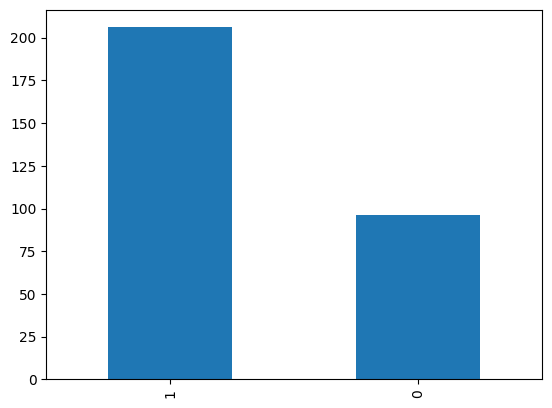

In [678]:
data_set['sex'].value_counts().plot(kind='bar')

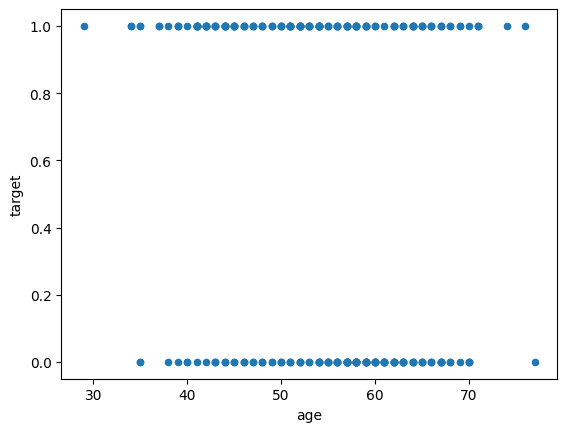

In [679]:
data_set.plot(x="age",y="target",kind="scatter")
plt.show()

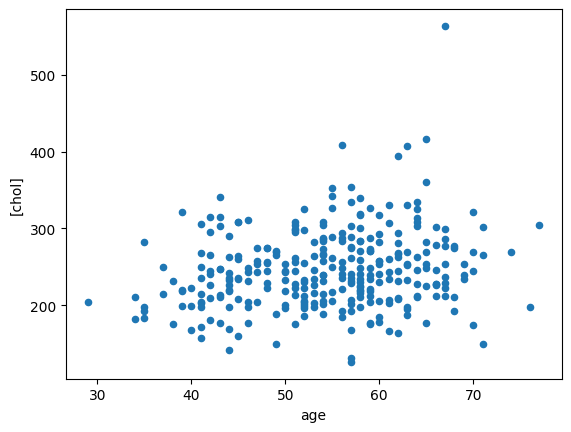

In [680]:
data_set.plot(x="age",y=["chol"],kind="scatter")
plt.show()

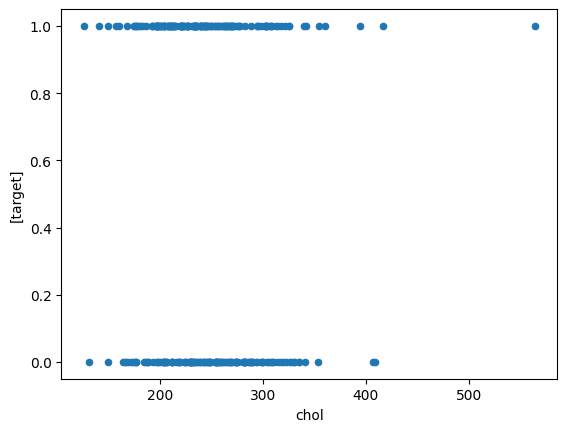

In [681]:
data_set.plot(x="chol",y=["target"],kind="scatter")
plt.show()

In [682]:
#data_set.loc[(data_set.age>20) and (data_set.age<30) and (data_set.target==1)]


2. Data Pre-processing and cleaning

3. Model Building

<b>Preparing Training and Test data set </b><br>

Case 1 : Train = 80 % Test = 20% [ x_train1,y_train1] = 80% ; [ x_test1, y_test1] = 20% <br>
Case 2 : Train = 10 % Test = 90% [ x_train2,y_train2] = 10% ; [ x_test2,y_test2] = 90% <br>

Case 1 Will be considered for building Training and Test data set.
Reason:
 *   Training data set will be used to train and develop the model. Hence it should have high amount of data
*   Also low amount of data in Training set might lead to a overfitting model
*   High amount of data in Training set will is necessary to build a more genaralized model




<Axes: >

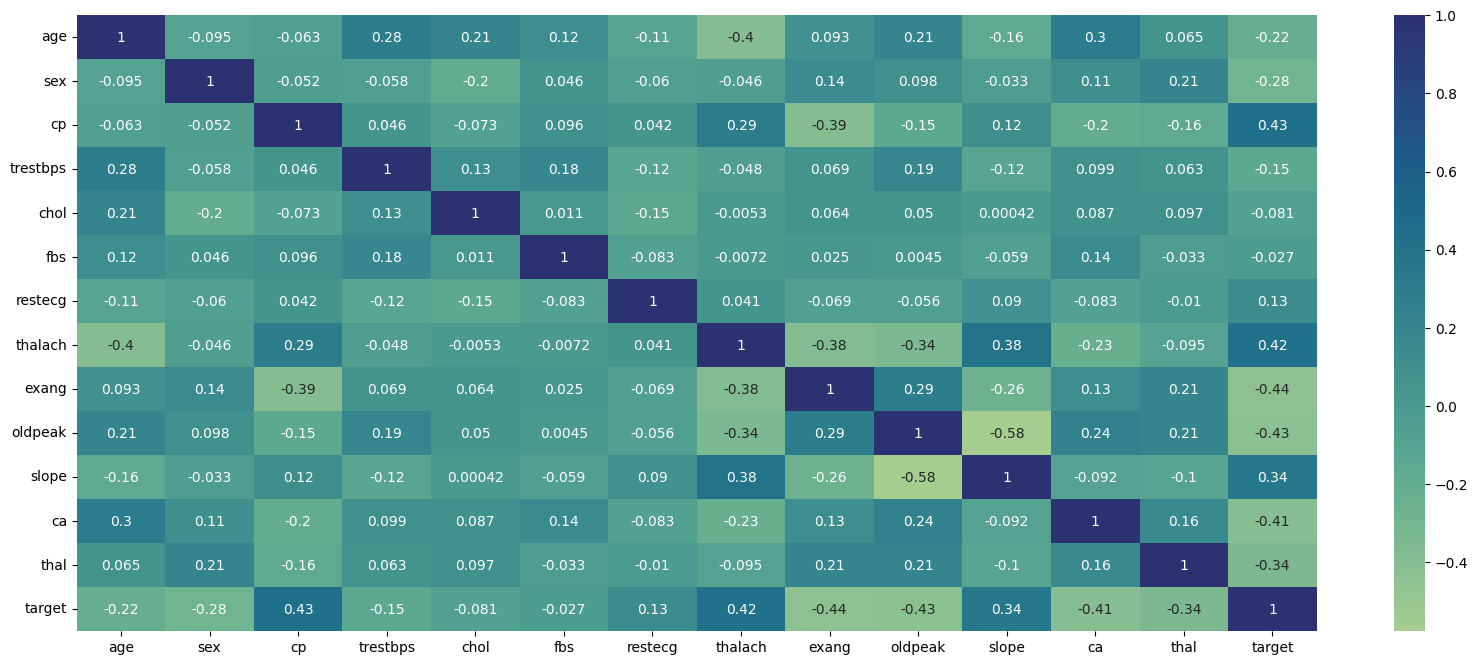

In [683]:
plt.figure(figsize= (20, 8))
sns.heatmap(data_set.corr(), annot = True, cmap= 'crest')

In [684]:
# Features scaling: 'chol, 'age', 'trestbps' and 'thalach' features have high range of values (77, 200 etc) compared to other features
# Hence taking log value for these features to have a similar scale across features
data_set['log_trestbps'] = nm.log(data_set['trestbps'])
data_set['log_thalach'] = nm.log(data_set['thalach'])
data_set['log_age'] = nm.log(data_set['age'])
data_set['log_chol'] = nm.log(data_set['chol'])


In [685]:
# Assigning columns to X
# Removing the original columns 'chol, 'age', 'trestbps' and 'thalach' - newly added log value columns will be used
# Additionaly removing 'fbs' as it has very low correlation with 'target'
X = data_set.loc[:,~data_set.columns.isin(['target', 'chol','trestbps','thalach','age'])]

# Y - Target column. 'target' from data_set column
Y = data_set['target']


# X - Predictor columns. All columns from data_set except 'target' column
# X = data_set.loc[:,~data_set.columns.isin(['target', 'chol','fbs','log_trestbps','log_thalach'])]
# X = data_set.loc[:,~data_set.columns.isin(['target', 'chol','fbs'])]
# X = data_set.loc[:,~data_set.columns.isin(['target','log_trestbps','log_thalach'])]

In [686]:
# 20% data assigned to Test data set and remaining 80% assigned to Training data set
(X_train, X_test, Y_train, Y_test) = train_test_split(X,Y,test_size=.20)

In [687]:
# Logistic regression model
logisticRegr = LogisticRegression(max_iter=1000,fit_intercept=False,solver='liblinear')
logisticRegr.fit(X_train, Y_train)

LogisticRegression(fit_intercept=False, max_iter=1000, solver='liblinear')

In [688]:
# Exploring K-fold cross validation

# Importing necessary library package
from sklearn.model_selection import KFold

# Setting K - Number of splits
kf = KFold(n_splits=5)
kfold = kf.split(X_train, Y_train)
scores = []

for k, (train, test) in enumerate(kfold):
    logisticRegr.fit(X_train.iloc[train, :], Y_train.iloc[train])
    score = logisticRegr.score(X_train.iloc[test, :], Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: %s, Accuracy: %.3f' % (k+1, nm.bincount(Y_train.iloc[train]), score))

print('\n\nCross-Validation accuracy: %.3f +/- %.3f' %(nm.mean(scores), nm.std(scores)))

Fold:  1, Training/Test Split Distribution: [ 90 102], Accuracy: 0.857
Fold:  2, Training/Test Split Distribution: [ 86 107], Accuracy: 0.792
Fold:  3, Training/Test Split Distribution: [ 90 103], Accuracy: 0.833
Fold:  4, Training/Test Split Distribution: [ 92 101], Accuracy: 0.875
Fold:  5, Training/Test Split Distribution: [ 90 103], Accuracy: 0.854


Cross-Validation accuracy: 0.842 +/- 0.029


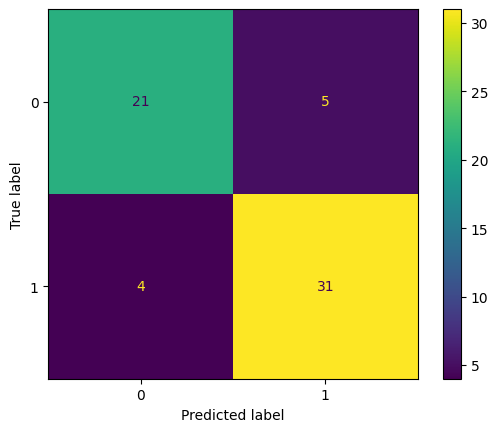

In [689]:
# Calculating Predicted values for all test data set
# And displaying Confusion matrix
predicted_values = logisticRegr.predict(X_test[:])
acutal_values = Y_test.array

cm = confusion_matrix(acutal_values, predicted_values, labels=logisticRegr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logisticRegr.classes_)
disp.plot()
plt.show()

In [690]:
# Calculate score by comparing the predict 'target' value Vs actual 'target' from the Test data
mean_accuracy = logisticRegr.score(X_test, Y_test)
print("Mean accuracy score: ",  mean_accuracy)
f1_score = sklearn.metrics.f1_score(acutal_values, predicted_values)
print('F1 score: ', f1_score)

Mean accuracy score:  0.8524590163934426
F1 score:  0.8732394366197184


<b>Steps done to improve Confusion Matrix and score</b> <br>
1. With all features included and in their original value range, the accuracy and f1 scores were around 0.78
2. Feature Scaling: Then we noticed that 'chol, 'age', 'trestbps' and 'thalach' features have high range of values (77, 200 etc) compared to other features. Hence, we took log values of those features for the model instead of the acutal values. The score improved to the range of 0.85 to 0.89